In [1]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, PickAndSolve, UFloat, utilities
import numpy as np
import pandas as pd
from Model.utilities import n_, s_

from PlotUtils import errsPlot as plt, splt

In [2]:
n_g = 2.687e25
T_g = 300
T_e = 2
f_e = 10**-5

In [3]:
ns = np.array( [ PickAndSolve.PickAndSolve().getEquilibrium(  n_g = n_g, f_e = f_e, T_e = T_e, T_g = T_g ) for i in range(100) ] )
n = np.array( [ utilities.mean( ns[:,i] ) for i in range( ns.shape[1] ) ] )
levels_tofit = Levels.Levels().namesToIdxs(['2p1','2p2','2p3','2p4','2p5','2p6','2p7','2p8','2p9','2p10'])
n_tofit = n[levels_tofit]

Initializing class Levels
Loaded 121 files
Loaded 82 rows


exports/SimulatedData.pdf


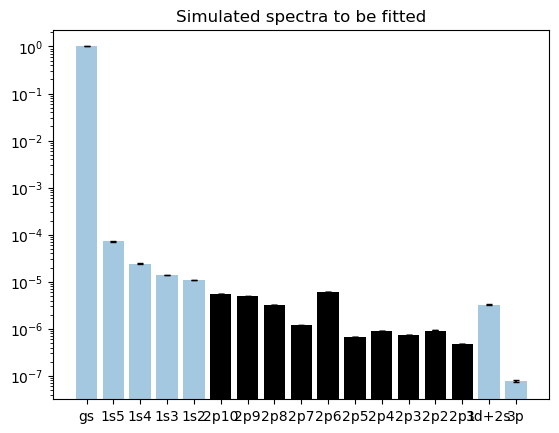

In [4]:
plt.figure()

plt.bar( Levels.Levels().all_names(), n, alpha = 0.4 )
plt.bar( levels_tofit, n_tofit, keep_color=True )
plt.yscale('log')

plt.title("Simulated spectra to be fitted")

splt.export("SimulatedData")

In [5]:
pd.DataFrame.from_dict({'label':  np.array(Levels.Levels().all_names())[levels_tofit], 'density_n': n_(n_tofit), 'density_s': s_(n_tofit)}).to_csv('exports/SimulatedData.csv', index=False)